# COGS 108 - Final Project 

# Overview

Our group focused on comparing the effect of GDP on suicide rates. To do this we used longitudinal data over 30 years and spaning 101 countries. We calculated the corelation between GDP and suicide rate for each year as well as those for males and females.

# Names

- EJ Ozyazgan
- David Kim
- Sarah Ehsan
- Steven Liu
- Weicong Dong

# Group Members IDs

- A13833934
- A13800407
- A14774985
- A15494258
- A13898714

# Research Question

How does a nation's wealth affect its suicide rate? 

## Background and Prior Work

Our dataset includes a variety of countries (101) with a breakdown of age, # of suicides, population, suicides per 100k population, country/year, HDI for year, GDP for year, GDP per capita, and generation. Choosing this dataset was due to our background knowledge on a nation's measure of wealth typically being GDP. 

When deciding our data science question, we came across a scholarly journal article that touched on similar topics which essentially allowed us to form a question based on the information we were exposed to. In the journal article titled “Prevalence and social correlated of postnatal depression in a country” in the journal Archives of Women’s Mental Health, the data study concluded that post-natal depression rates are higher in developing countries. With this information, we found it interesting that a correlation between a countries’ developing status and post-natal depression even existed. With that being said, we wanted to formulate a question that was similar yet broad as well as a more concrete method of examining wealth; GDP. 

Although the common belief may be that nations with less wealth probably experience higher rates of suicide, it’s important to consider other factors that may drive citizens of a wealthier nation into depression. The reason why we stand by our hypothesis is that we believe that there are pressure and expectations to succeed in wealthier nations. There is a stigma of being expected to attend university and achieve the “American dream” in the United States which is stressful amongst our youth. As well as pressure to succeed, there are other factors in wealthier nations that we strongly believe contribute to this correlation. For example, plastic surgery rates in the United States are at an all-time high which has affected our rates of depression. 


References (include links):
- Husain, N., et al. “Prevalence and Social Correlates of Postnatal Depression in a Low Income Country.” SpringerLink, Springer-Verlag, 24 Apr. 2006, link.springer.com/article/10.1007/s00737-006-0129-9.

# Hypothesis


Countries with more wealth (aka higher GDP) experience higher rates of suicide. 

Explaination: The reason we make this hypothesis is that the wealth people may have more stress in their life and their lives may have higher pace, which means they don't have time to release their stress. So they may be more likely to suicide.

# Dataset(s)

- Dataset Name: Suicide Rates Overview 1985 to 2016
- Link to the dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
- Number of observations: 27820

This dataset has data from 101 contries for the years 1985 - 2016 consisting of age, suicides_no, population, suicides/100k pop, country-year, HDI for year, gdp_for_year (\\$), and gdp_per_capita (\\$)

- Dataset Name: GDP Deflator
- Link to the dataset: https://data.worldbank.org/indicator/NY.GDP.DEFL.ZS
- Number of observations: 264

This dataset has the GDP deflation rates for many difirent countries from 1960 - 2018

# Setup

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import ttest_ind

In [6]:
df = pd.read_csv('master.csv')
df_deflation = pd.read_csv('gdp_deflatioin.csv')

# Data Cleaning

We got lucky that our data was already quite clean, however to get it more clean, we renamed the data columns to be easier to understand. 

We also dropped all rows that were missing data in our key variables GDP, GDP Per Capita, Suicide Per 100K, and Year

Our data set broke down each countries yearly data into diffirent age groups as well as male and female. We wanted to just look at the countries suicide rate as a whole, so we also calculated the suicide rate per gender for each country for every year. This reduced our overal data cignificatly since each year was reduced to just two datapoints instead of 8-12. 

Inorder to have a true comparison accross years, we also replaced the gdp with the countries real gdp for that year. The deflation rate used was from our dataset from the World Bank. We also used the United States deflation rate since the gdp was in US Dollars and we wanted all cpuntries to be calculated consistantly. 

In [7]:
df_deflation.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

Here is how the deflation dataframe looks like:

In [8]:
df_deflation.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137.809984,142.092154,143.213384,139.987882,142.475218,145.383223,143.271848,144.255446,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.690570,218.834717,234.813495,246.138046,247.533513,253.592051,266.532126,271.723432,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,588.945042,776.061968,832.370776,856.007977,886.488904,855.298765,1041.534079,1277.071853,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,184.137996,188.391879,190.351094,190.904538,193.871875,194.962866,194.028363,196.694780,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.379593,132.613911,134.072550,134.073033,133.938468,133.328425,134.261587,135.469847,NaN,NaN


In [9]:
# Renaming the columns of the dataframe
df.columns = ["country", "year", "sex", "age", "suicides", "population", "suicides_per_100K", 
              "country-year", "hdi", "gdp", "gdp_per_capita", "generation"]

# Drop rows that are missing key data, GDP, GDP Per Capita, Suicide Per 100K, and Year
df.dropna(subset=['country', 'year', 'suicides', 'suicides_per_100K', 'gdp', 'gdp_per_capita'],
          inplace=True)

In the code block below, we combine all age groups and calculate the real gdp for each obeservation.

In [10]:
# Calculating the suicide rate per gender per year for each country. Save onto new df
new_df = pd.DataFrame(columns = ["country", "year", "sex", "suicides", "population", "suicide_rate", "gdp", "gdp_per_capita"])


index = 0 
while index < len(df): 
    cur_idx = index
    year = df['year'][index]
    cur_year = df['year'][index]
    country = df['country'][index]
    ####
    rate = df_deflation[df_deflation['Country Name'] == 'United States'][str(year)].values[0]/100
    gdp = int(df['gdp'][index].replace(',', ''))/rate
    gdp_per_capita = df['gdp_per_capita'][index]/rate
    
    men_pop=0
    women_pop=0
    
    men_suicide = 0
    women_suicide = 0
    
    while cur_year == year:
        if df['sex'][index] == 'male':
            men_pop += df['population'][index]
            men_suicide += df['suicides'][index]
        else:
            women_pop += df['population'][index]
            women_suicide += df['suicides'][index]
        index += 1
        
        if index ==len(df):
            break
        cur_year = df['year'][index]
        
    
    new_df = new_df.append({'country': country, 'year': year, 'sex': 'male', 'suicides': men_suicide, 'population':men_pop, 'suicide_rate': (men_suicide/men_pop)*100, 'gdp': gdp, 'gdp_per_capita': gdp_per_capita}, ignore_index=True)
    new_df = new_df.append({'country': country, 'year': year, 'sex': 'female', 'suicides': women_suicide, 'population':women_pop, 'suicide_rate': (women_suicide/women_pop)*100, 'gdp': gdp, 'gdp_per_capita': gdp_per_capita}, ignore_index=True)




In [11]:
new_df.head()

,country,year,sex,suicides,population,suicide_rate,gdp,gdp_per_capita
0,Albania,1987,male,48,1392700,0.003447,3.645254e+09,1345.446051
1,Albania,1987,female,25,1316900,0.001898,3.645254e+09,1345.446051
2,Albania,1988,male,41,1420700,0.002886,3.471941e+09,1255.843202
3,Albania,1988,female,22,1343600,0.001637,3.471941e+09,1255.843202
4,Albania,1989,male,53,1439800,0.003681,3.670741e+09,1309.449076


# Data Analysis & Results

Plotting scatter plot for all observations

Below we have created a scatterplot that presents each country's male and female data each as an individual point on the scatterplot showing GDP and suicide rate. Our X-axis is the country's GDP per capita, while our Y-axis is our suicide rate. The blue points represent male data points, while the orange points reprsent female data points. The data represents every country in the dataset with a point for each year within the span of 30 years. We decided to make this scatterplot to start our EDA because it provides a general overview that includes all the data of the possible correlation between GDP and suicide rate that also accounts for gender. 

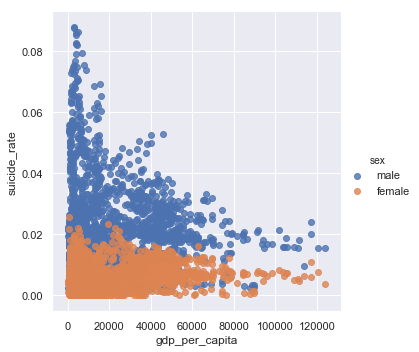

In [8]:
sns.lmplot('gdp_per_capita', 'suicide_rate', data=new_df, hue='sex',fit_reg=False)

Analysis: Examining the scatterplot above, we can see that, generally, that countries with higher GDP per capita tend to have lower suicide rates than coutties with lower GDP per capita. Another observation is that the suicide rates amongst males are significantly greater than that of females. This distinction seems to be the strongest for countries with extremely low GDP per capita. 

#### Scatterplots by Countries

Below we display the same data as our first scatterplot above, except this time we created one scatterplot per country so each country's data can be visuallized on a more individual scale. Just as before, the X-axis is the country's GDP per capita, while the Y-axis is the suicide rate. The blue points represent male data points, while the orange points reprsent female data points. A regression is displayed for each gender as well, colored in the same way as the data points.

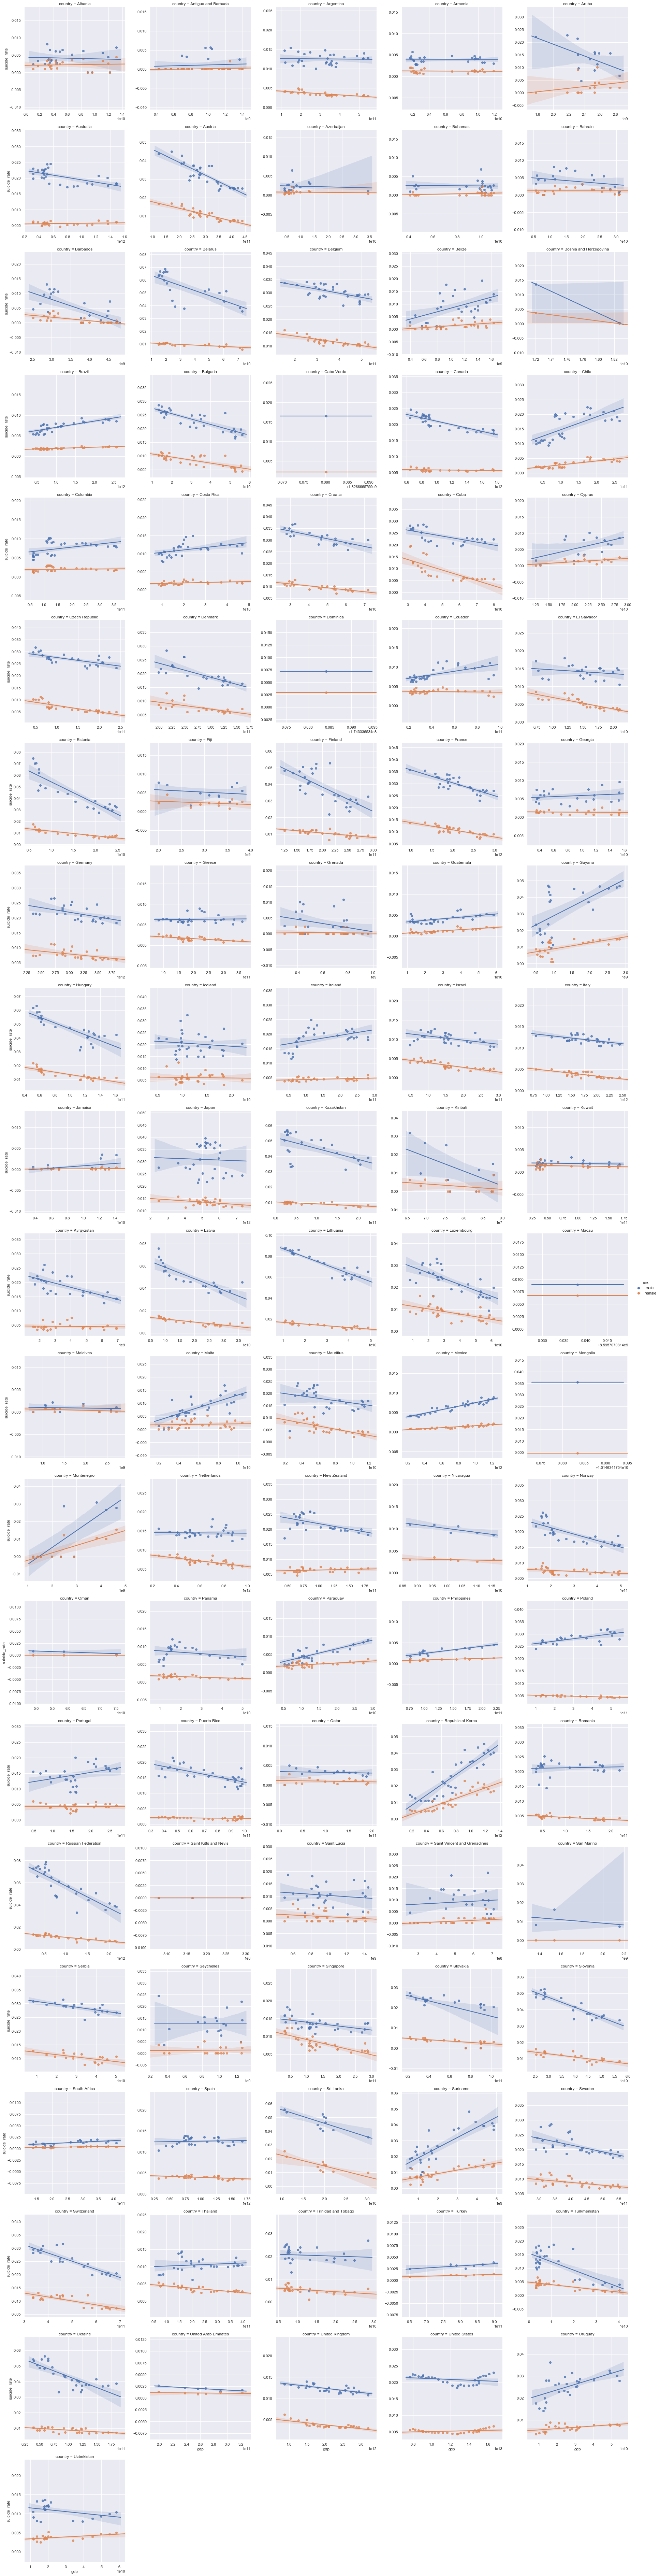

In [12]:
ax = sns.lmplot(x="gdp", y="suicide_rate", col="country", data=new_df, col_wrap=5, hue="sex", sharex=False, sharey=False)
ax.add_legend()

fig = ax.fig
fig.savefig('country_figs.png')


Generally, when observing all the graphs, most of the countries seem to have lower suicide rates when their GDP is higher. A majority of the regression lines show a negative correlation between GDP and suicide rate for both genders, which may imply that a higher GDP may lead to lower suicide rates. Between all the graphs displayed, the regression lines for graphs representing coutries with larger populations can be seen as more reliable because there are enough data points to make logical assumptions without fear of overpowering outliers. On the other hand, for some of the graphs, there are extremely few data points provided to a point where it's impossible to make any confident statistical judgements based on the graph. For instance, the country San Marino only has roughly 6 data points, 3 per gender. Although a regression line does exist, there are not enough data points for it be used to draw greater conclusions. 
Upon deeper investigation, there are some graphs that contradict the relationship that higher GDP leads to less suicide rates, which can be seen as outlier. For example, the Republic of Korea, a country with a large enough population to draw significant conclusions from, has higher suicide rates during the years where the GDP was also higher.

### Correlations
Here we use pearson method to calculate the correlation between suicide_rate and gdp_per_capita for each country and then so analysis.

In [10]:
countries = new_df['country'].unique()
corr=[]
corr_female =[]
corr_male =[]
for country in countries:
    
    temp_df = new_df[new_df['country']==country].corr(method='pearson')
    corr.append(temp_df['gdp_per_capita']['suicide_rate'])
    
    female_df = new_df[(new_df['country']==country) & (new_df['sex']=='female')].corr(method='pearson')
    corr_female.append(female_df['gdp_per_capita']['suicide_rate'])
    
    male_df = new_df[(new_df['country']==country) & (new_df['sex']=='male')].corr(method='pearson')
    corr_male.append(male_df['gdp_per_capita']['suicide_rate'])    
    

In [11]:
corr_dict = {'country':countries,'correlation':corr, 'female_correlation': corr_female, 'male_correlation': corr_male}

corr_df = pd.DataFrame.from_dict(corr_dict)

In [12]:
corr_df.head()

,country,correlation,female_correlation,male_correlation
0,Albania,-0.030774,0.054219,-0.086999
1,Antigua and Barbuda,0.113029,0.106939,0.151149
2,Argentina,-0.077140,-0.695968,-0.247114
3,Armenia,0.005287,-0.050969,0.049080
4,Aruba,-0.084608,0.302546,-0.413274


Below is a barplot displaying the correlations between GDP and suicide rate for all the countries in our dataset. We decided to use this barplot because it clearly displays whether there are more countries with a positive correlation or a negative correlation. Also, this graph enables us to view any extreme data points, which can make identifying outliers an easier task.

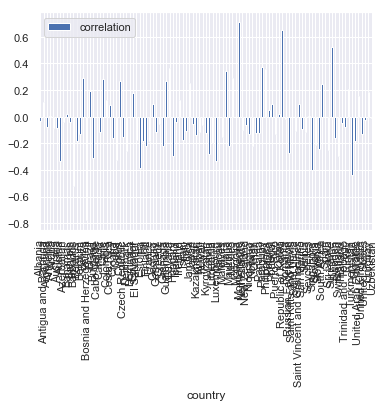

In [13]:
corr_bar = corr_df.plot.bar(x='country', y='correlation', rot=90)


Analysis: Based on the graph above, we observed that there are a significantly greater number of countries with a negative correlation than countries with a positive correlation. Another interesting observation is that the correlations with the greatest magnitude tend to be positive correlations, which could possibly be attributed to a variety of external factors such as cultural practices and beliefs.

In [14]:
#function to convert correlation value to label (pos, neg, none)
def convert_corr(corr):
    if corr < 0.1 and corr > -0.1:
        return 'none'
    elif corr > 0.1:
        return 'pos'
    else:
        return 'neg'

In [15]:
corr_df["correlation_label"] =corr_df["correlation"].apply(convert_corr)
corr_df.head()

,country,correlation,female_correlation,male_correlation,correlation_label
0,Albania,-0.030774,0.054219,-0.086999,none
1,Antigua and Barbuda,0.113029,0.106939,0.151149,pos
2,Argentina,-0.077140,-0.695968,-0.247114,none
3,Armenia,0.005287,-0.050969,0.049080,none
4,Aruba,-0.084608,0.302546,-0.413274,none


Then we count lables:

In [16]:
label_counts = corr_df['correlation_label'].value_counts()
print(label_counts)

neg     52
none    27
pos     22
Name: correlation_label, dtype: int64


The bar plot below summarizes the previous barplot by focussing on the counts of postive, negative, and "none" correlations. This graph is useful to include because it clearly displays what the most frequent kind of correlation is within the dataset (positive, negative, or no correlation).

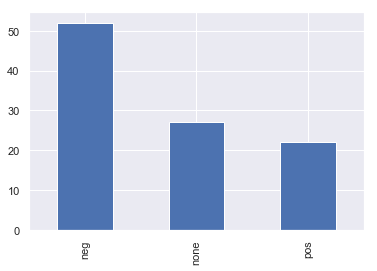

In [17]:
label_counts.plot(kind='bar')

Analysis: Upon immediate inspection on the graph, we determine that there is a significantly greater amount of negative correlations than "none" or positive correlations. Again, this might suggest that GDP negatively correlates to suicide rate, meaning that increases in GDP could lead to decreases in suicide rate. We also find it interesting that are so many countries with no correlation, even more than that of countries with a positive correlation. This might be due to many countries not having enough data to create a correlation, or maybe those countries' suicide rates are affected by factors other than GDP.

### Changes in suicide rates and GDP per country for each year
Here we want to see the change of suicide rate and gdp per capital versus time for each country, which can directly show whether they have correlation.

In [18]:
change_df = pd.DataFrame(columns = ["country", "year", "change", "type"])

i = 2
while i < len(new_df): 
    country = new_df['country'][i]
    
    if country != new_df['country'][i-1]:
        i += 2
        continue
        
    year = new_df['year'][i]
    
    avg_rate_1 = (new_df['suicide_rate'][i-2] + new_df['suicide_rate'][i-1]) / 2
    avg_rate_2 = (new_df['suicide_rate'][i] + new_df['suicide_rate'][i+1]) / 2
    
    suicide_change = 0
    
    if(avg_rate_1 != 0 and avg_rate_2 != 0):
        suicide_change = (avg_rate_2 / avg_rate_1) - 1
    
    gdp_change = 0
    
    if(new_df['gdp'][i] != 0 or new_df['gdp'][i-1] != 0):
        gdp_change = (new_df['gdp'][i] / new_df['gdp'][i-1]) - 1
        
    i += 2
    
    change_df = change_df.append({'country': country, 'year': year, 'change': suicide_change,  'type': 'suicide'}, ignore_index=True)
    change_df = change_df.append({'country': country, 'year': year, 'change': gdp_change,  'type': 'gdp'}, ignore_index=True)

change_df.head(10)


,country,year,change,type
0,Albania,1988,-0.153724,suicide
1,Albania,1988,-0.047545,gdp
2,Albania,1989,0.057048,suicide
3,Albania,1989,0.057259,gdp
4,Albania,1992,-0.301028,suicide
5,Albania,1992,-0.722777,gdp
6,Albania,1993,0.563463,suicide
7,Albania,1993,0.690784,gdp
8,Albania,1994,-0.324320,suicide
9,Albania,1994,0.583212,gdp


The graphs below are lineplots for each country, where the changes in GDP and the changes in suicide rate are displayed in respect to time. The X-axis is the year, while the Y-axis is the change of suicide-rate/GDP. The orange line represents the change in GDP, while the blue line represents the change in suicide rate. These graphs are useful because they can show if the changes in one line parallel the changes in the other line. If the blue and orange line move together on the same years, then that might suggest that higher GDP correlates to higher suicide rates. If the blue and orange line increase/decrease on the different years, then that might suggest that higher GDP correlates to lower suicide rates. 

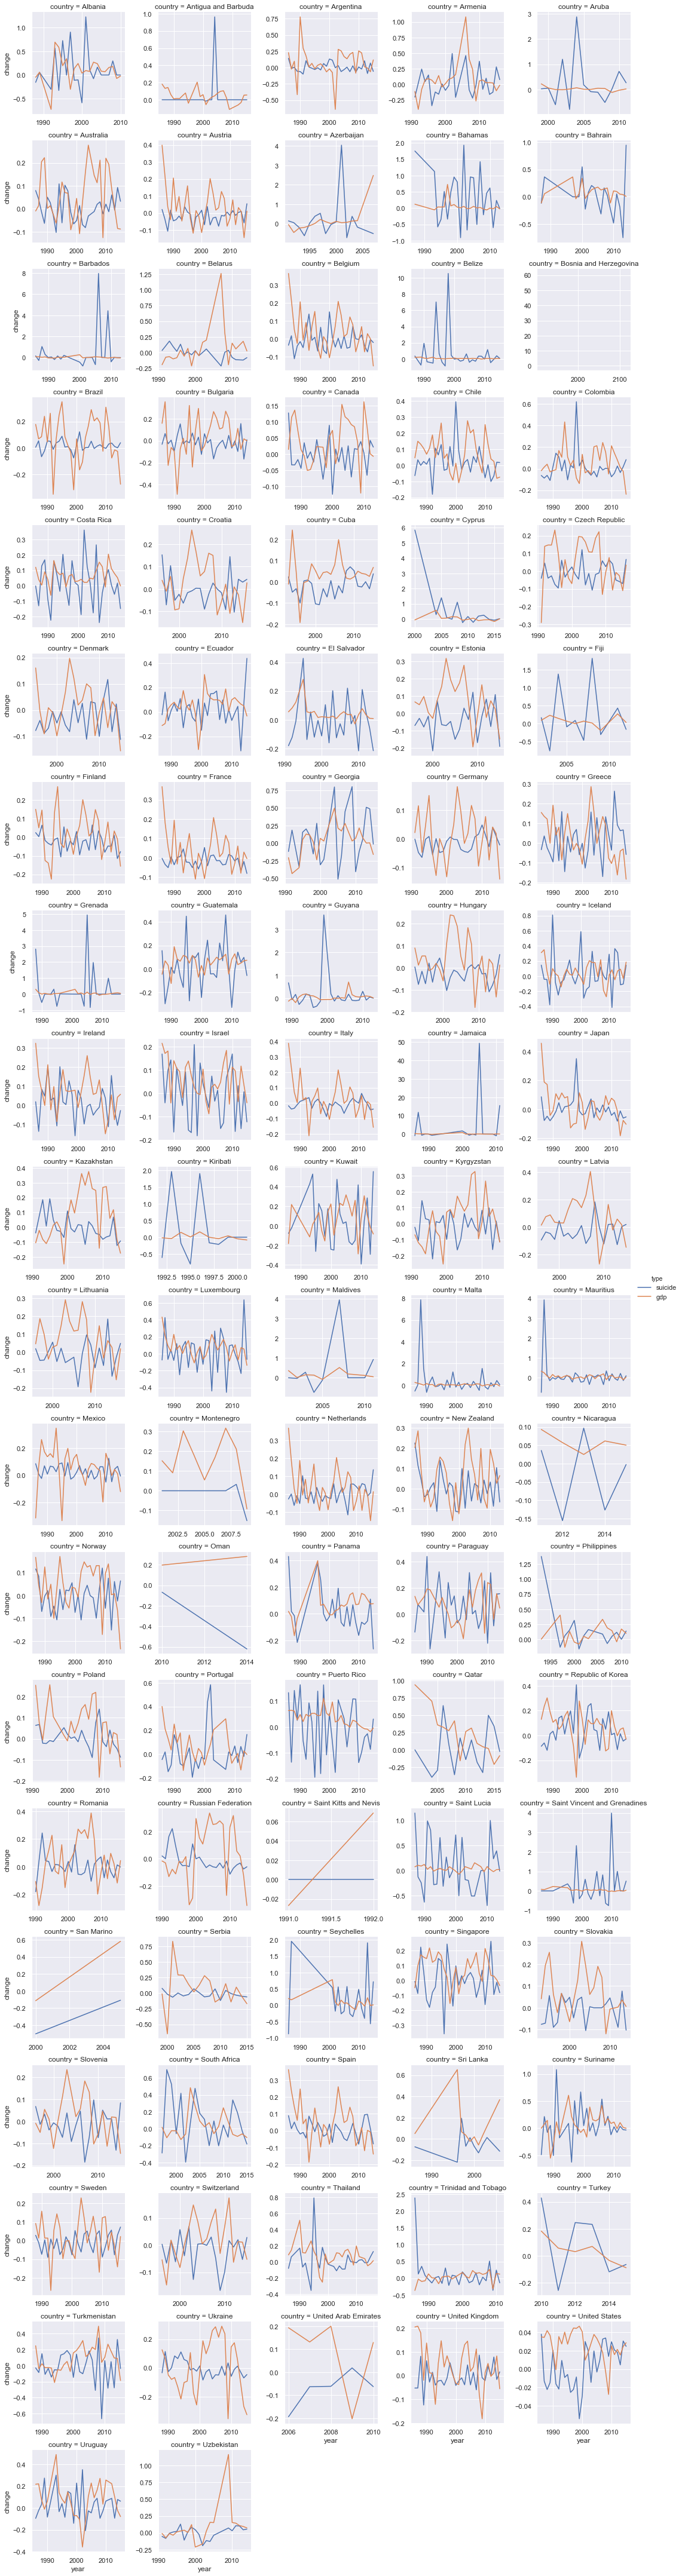

In [19]:
ax = sns.FacetGrid(change_df, col="country", col_wrap=5, hue='type', sharex=False, sharey=False, margin_titles=True)
ax.map(sns.lineplot, "year", "change");
ax.add_legend()

fig = ax.fig
fig.savefig('country_yearly_change_figs.png')


Analysis: Upon observing all the graphs as a whole, it seems that most countries' orange and blue lines do not change on parallel paths. For instance, in the United States around year 2000, there was a sudden, large decrease in the country's GDP while there was a huge sudden increase in the country's suicide rate that year. Because, for most countries, the blue and orange lines seem to fluctuate in different directions, there could be a negative correlation between GDP and suicide rate.

# Ethics & Privacy

**Data Collection**

The data we are using is being downloaded from kaggle, which is publicly available on the web. Even though the topic of suicide is extremely sensitive and private, the data we are using only shows national statistics and does not reveal information on individuals and their identities. 

**Data Storage**

The dataset is publicly available and when we update the dataset with more information, it will be stored within our Google Drive folder, where it is presumably safe since Google Drive folders are only accessible to those explicitly granted access.

**Analysis**

All of our analysis visualizations will not have any personally identifiable information. We also acknowledge the bias of this dataset toward not looking at all countries in the world. We will be careful in generalizing our results.

**Modeling**

To create models, we will be looking at variables such as GDP, country, suicide rate, and year. Through these models, we will draw conclusions to see if some variables correlate to other variables, while also being careful to account for confounding variables and potential outliers.

**Deployment**

In the case that the sensitive nature of the topic of suicide related to factors such as GDP and country cause negative impacts, we will reconsider the variables we are analyzing to meet different standards.


# Conclusion & Discussion

From our data and results, we can immediately state that our hypothesis is FALSE. We initially hypothesized that counties with a higher GDP would experience higher rates of suicide. Our results displayed the opposite where there was a greater negative correlation trend which means higher GDP = lower suicide rates and lower GDP = higher suicide rates. Upon extracting data and creating our graphs, we came across new findings as well that were important enough to take into consideration. For example, it seems as though the suicide rate can be divided into gender and that there is significantly more males with higher suicide rates amongst all of the data especially in the lower GDP regions. With that being said, it leads us to discuss if GDP alone isn’t affecting populations as a whole but perhaps a variety of factors. We pondered on this question once more when examining the graphs per country and noticed that some were outliers / in the extreme as well as contradicting the popular trend of negative correlation. For example, the Republic of Korea presented a positive correlation (higher gdp = higher suicides) but on a larger scale. We questioned if maybe cultural practices, expectations to succeed in such a successful nation, etc play a role. We also noticed that nations with very few data points didn’t really represent a trend/correlation but rather stagnant, this is a limitation in our data. This leads us to wonder what the correlation would be had there have been more data points provided to us or a more consistent amount amongst all the countries in the data set. With all projects utilizing data, there is bound to be imperfect data which can potentially skew results so it’s important to question findings, consider external points, and analyze each category.